<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Librairies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="coolwarm", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt
import os
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [ ]:
df= pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
np.round(df.describe(), decimals=2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


# **1. First Assumption: Linearity**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


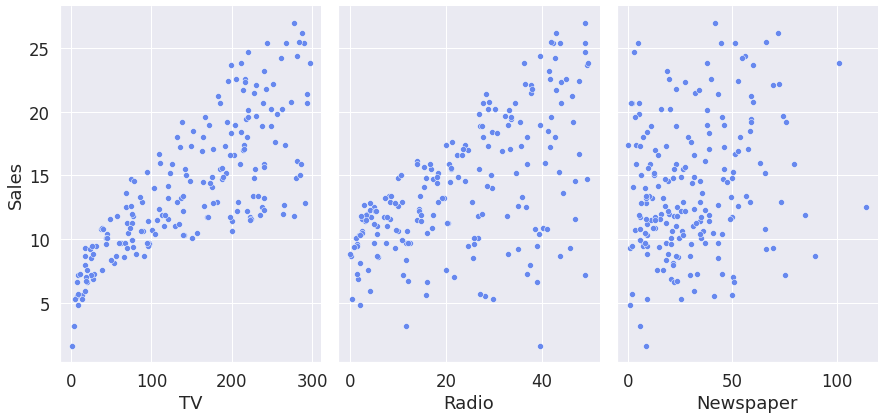

In [ ]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], size=6, aspect= 0.7)

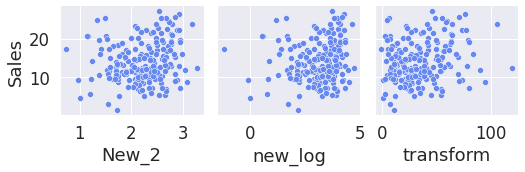

In [ ]:
#Newspaper doesnot have a linear relationship with sales. Therefore, some transformation is used to train the models
df['New_2']=df['Newspaper']**.25
df["new_log"]= np.log(df['Newspaper'])
df["transform"]= np.log(df['Newspaper'])+df['Newspaper']
df.head()
sns.pairplot(df, x_vars=['New_2','new_log','transform'],y_vars=['Sales'])

In [ ]:
df.drop(columns= ['Newspaper','New_2','new_log','transform'], axis=1, inplace=True)

# **Splitting the Dataset**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# **Scaling the independant variables**

In [ ]:
sc_x= StandardScaler()
sc_y=StandardScaler()
x_train= sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

# **Trainig the Model**

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= np.round(regressor.predict(x_test), decimals=3)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[11.051 11.3  ]
 [ 8.557  8.4  ]
 [ 8.166  8.7  ]
 [24.596 25.4  ]
 [12.995 11.7  ]
 [ 7.714  8.7  ]
 [13.792  7.2  ]
 [15.897 13.2  ]
 [11.848  9.2  ]
 [17.08  16.6  ]
 [23.454 24.2  ]
 [10.189 10.6  ]
 [11.435 10.5  ]
 [16.247 15.6  ]
 [12.524 11.8  ]
 [13.068 13.2  ]
 [19.375 17.4  ]
 [11.703  1.6  ]
 [16.715 14.7  ]
 [18.001 17.   ]
 [24.637 26.2  ]
 [10.605 10.3  ]
 [15.966 14.9  ]
 [13.336 12.9  ]
 [ 6.904  8.1  ]
 [16.01  15.2  ]
 [13.211 12.6  ]
 [21.492 22.6  ]
 [14.286 11.6  ]
 [10.138  8.5  ]
 [14.015 12.5  ]
 [22.038 23.7  ]
 [18.876 16.1  ]
 [21.731 21.8  ]
 [ 7.787  5.6  ]
 [ 7.309  6.7  ]
 [ 9.043  9.7  ]
 [14.012 12.9  ]
 [15.525 13.6  ]
 [ 7.373  7.2  ]]


## **2.Mean of Residuals**: it should be close to zero

In [ ]:
Residuals= y_test- y_pred
print(np.round(np.mean(Residuals), decimals=3))

-0.975


# **3. Check for Homoscedasticity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


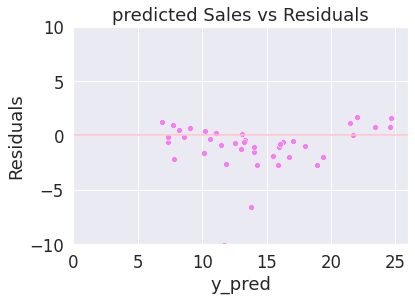

In [ ]:
sns.scatterplot( y_pred,Residuals, color= 'violet')
plt.title('predicted Sales vs Residuals')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.xlim(0,26)
plt.ylim(-10,10)
sns.lineplot([0,26],[0,0],color='pink')

# **GoldFeld Quandt Test**

if p-value is greater than 0.05 the null hypothesis 
is accepted. null: there is homoscedasticity 

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Residuals, x_test)
lzip(name, test)

[('F statistic', 0.291558368458169), ('p-value', 0.9938651201014251)]

# **4.Normlity of Residuals**

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  8.,  9., 12.,  9.]),
 array([-10.103 ,  -8.9265,  -7.75  ,  -6.5735,  -5.397 ,  -4.2205,
         -3.044 ,  -1.8675,  -0.691 ,   0.4855,   1.662 ]),
 <a list of 10 Patch objects>)

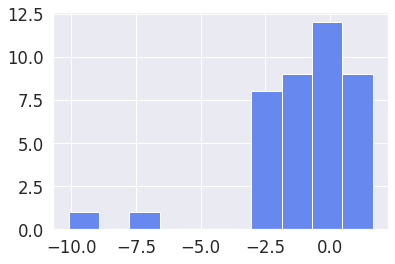

In [ ]:
plt.hist(Residuals)

# **5. Autocorrelation**

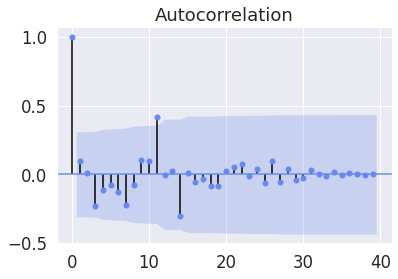

In [ ]:
sm.graphics.tsa.plot_acf(Residuals, lags=39)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


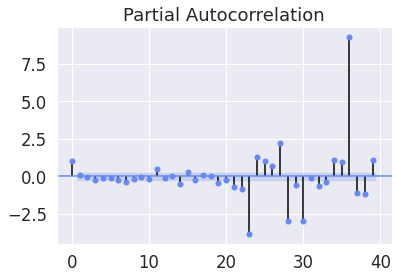

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(Residuals, lags=39)
plt.show()

There spots outside the blue area which is the sign of autocorrelation

# **6. No perfect multicollinearity¶**

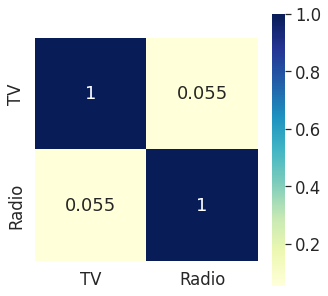

In [ ]:
df.drop(columns= ['Sales'], axis=1, inplace=True)
plt.figure(figsize=(5,5))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu",square=True)

As can be seen most of the presumptions are not satisfied so linear regression does give us a reliable model. Therefore, another model is used.

# **RandomForest Regression**

In [ ]:
regressor_f= RandomForestRegressor()
regressor_f.fit(x_train, y_train)
y_pred_f= regressor_f.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.round(r2_score(y_test, y_pred_f), decimals= 3))


[[11.051 11.3  ]
 [ 8.557  8.4  ]
 [ 8.166  8.7  ]
 [24.596 25.4  ]
 [12.995 11.7  ]
 [ 7.714  8.7  ]
 [13.792  7.2  ]
 [15.897 13.2  ]
 [11.848  9.2  ]
 [17.08  16.6  ]
 [23.454 24.2  ]
 [10.189 10.6  ]
 [11.435 10.5  ]
 [16.247 15.6  ]
 [12.524 11.8  ]
 [13.068 13.2  ]
 [19.375 17.4  ]
 [11.703  1.6  ]
 [16.715 14.7  ]
 [18.001 17.   ]
 [24.637 26.2  ]
 [10.605 10.3  ]
 [15.966 14.9  ]
 [13.336 12.9  ]
 [ 6.904  8.1  ]
 [16.01  15.2  ]
 [13.211 12.6  ]
 [21.492 22.6  ]
 [14.286 11.6  ]
 [10.138  8.5  ]
 [14.015 12.5  ]
 [22.038 23.7  ]
 [18.876 16.1  ]
 [21.731 21.8  ]
 [ 7.787  5.6  ]
 [ 7.309  6.7  ]
 [ 9.043  9.7  ]
 [14.012 12.9  ]
 [15.525 13.6  ]
 [ 7.373  7.2  ]]
0.893


# **Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
regressor_svr= SVR()
regressor_svr.fit(x_train, y_train)
y_pred_svr= regressor_svr.predict(x_test)
print(np.concatenate((np.round(y_pred_svr,decimals=2).reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))
print(np.round(r2_score(y_test,y_pred_svr), decimals=3))

[[12.   11.3 ]
 [ 9.9   8.4 ]
 [ 9.89  8.7 ]
 [22.37 25.4 ]
 [12.64 11.7 ]
 [ 9.33  8.7 ]
 [11.3   7.2 ]
 [13.65 13.2 ]
 [10.46  9.2 ]
 [16.99 16.6 ]
 [23.03 24.2 ]
 [11.51 10.6 ]
 [11.4  10.5 ]
 [16.12 15.6 ]
 [12.99 11.8 ]
 [13.84 13.2 ]
 [17.92 17.4 ]
 [ 9.56  1.6 ]
 [15.57 14.7 ]
 [17.92 17.  ]
 [22.43 26.2 ]
 [11.08 10.3 ]
 [16.   14.9 ]
 [13.98 12.9 ]
 [ 8.85  8.1 ]
 [16.47 15.2 ]
 [13.06 12.6 ]
 [22.42 22.6 ]
 [12.19 11.6 ]
 [10.    8.5 ]
 [13.58 12.5 ]
 [22.22 23.7 ]
 [16.16 16.1 ]
 [22.41 21.8 ]
 [ 8.72  5.6 ]
 [ 8.56  6.7 ]
 [10.4   9.7 ]
 [13.52 12.9 ]
 [14.65 13.6 ]
 [ 8.69  7.2 ]]
0.883
